In [2]:
import typing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import QuantLib as ql
import yfinance as yf
import pandas_market_calendars as mcal
import constants as cs
import model
import utils

[*********************100%%**********************]  2 of 2 completed


,LONN.SW,SIKA.SW
Date,,
2023-08-08,491.200012,267.5


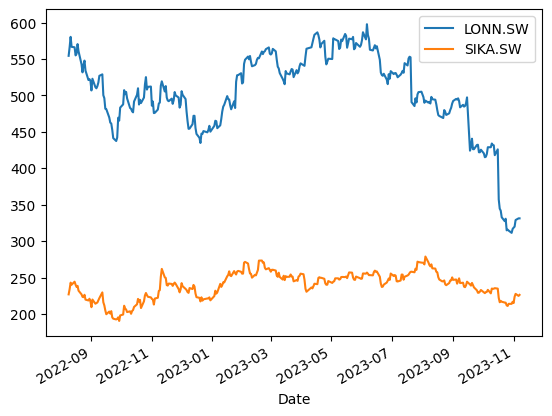

In [3]:
historical_start_date = '2022-08-09'
# Define the ticker list
ticker_list = ['LONN.SW', 'SIKA.SW']

# Fetch the data
data = yf.download(ticker_list, historical_start_date)['Adj Close'] # Auto adjust is false
data.plot()
display(data[data.index == pd.to_datetime('2023-08-08')])


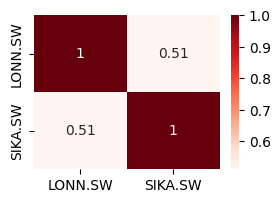

In [4]:
plt.figure(figsize=(3,2))
sns.heatmap(data.corr(), cmap="Reds", annot=True)
plt.show()

In [5]:
data

,LONN.SW,SIKA.SW
Date,,
2022-08-09,554.423462,227.111465
2022-08-10,566.350830,234.319778
2022-08-11,580.464905,243.206757
2022-08-12,566.748413,240.343170
2022-08-15,566.152039,244.490433
...,...,...
2023-11-01,318.600006,215.199997
2023-11-02,320.000000,223.800003
2023-11-03,329.100006,227.800003


In [6]:
# Check all attributes of the constants module
dir(cs)


['BARRIER',
 'CONVERSION_RATIOS',
 'COUPON_PAYMENT_DATES',
 'COUPON_PAYOUT',
 'COUPON_RATE',
 'DENOMINATION',
 'EARLY_REDEMPTION_DATES',
 'EARLY_REDEMPTION_LEVEL',
 'EARLY_REDEMPTION_LEVELS',
 'EARLY_REDEMPTION_OBSERVATION_DATES',
 'EARLY_REDEMPTION_OBSERVATION_FREQUENCY',
 'FINAL_FIXING_DATE',
 'FIRST_PRODUCT_PRICE_EST_DATE',
 'HISTORICAL_START_DATE',
 'INITIAL_FIXING_DATE',
 'ISSUE_PRICE_PERCENTAGE',
 'PAYMENT_DATE',
 'REDEMPTION_DATE',
 'SIX_HOLIDAY_DATES',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'pd']

In [7]:
print(cs.SIX_HOLIDAY_DATES)


[Timestamp('2023-01-02 00:00:00'), Timestamp('2023-04-07 00:00:00'), Timestamp('2023-04-10 00:00:00'), Timestamp('2023-05-01 00:00:00'), Timestamp('2023-05-18 00:00:00'), Timestamp('2023-05-29 00:00:00'), Timestamp('2023-08-01 00:00:00'), Timestamp('2023-12-25 00:00:00'), Timestamp('2023-12-26 00:00:00'), Timestamp('2024-01-01 00:00:00'), Timestamp('2024-01-02 00:00:00'), Timestamp('2024-03-29 00:00:00'), Timestamp('2024-04-01 00:00:00'), Timestamp('2024-05-01 00:00:00'), Timestamp('2024-05-09 00:00:00'), Timestamp('2024-05-20 00:00:00'), Timestamp('2024-08-01 00:00:00'), Timestamp('2024-12-24 00:00:00'), Timestamp('2024-12-25 00:00:00'), Timestamp('2024-12-26 00:00:00'), Timestamp('2024-12-31 00:00:00')]


Holidays in the calendar up to 2200: (numpy.datetime64('2200-04-04'), numpy.datetime64('2200-04-07'), numpy.datetime64('2200-05-01'), numpy.datetime64('2200-05-15'), numpy.datetime64('2200-05-26'), numpy.datetime64('2200-08-01'), numpy.datetime64('2200-12-24'), numpy.datetime64('2200-12-25'), numpy.datetime64('2200-12-26'), numpy.datetime64('2200-12-31'))
[Timestamp('2023-08-09 00:00:00')]
2023-08-09 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Holidays in the calendar up to 2200: (numpy.datetime64('2200-04-04'), numpy.datetime64('2200-04-07'), numpy.datetime64('2200-05-01'), numpy.datetime64('2200-05-15'), numpy.datetime64('2200-05-26'), numpy.datetime64('2200-08-01'), numpy.datetime64('2200-12-24'), numpy.datetime64('2200-12-25'), numpy.datetime64('2200-12-26'), numpy.datetime64('2200-12-31'))
Empty DataFrame
Columns: []
Index: [2020-01-03 00:00:00, 2020-01-06 00:00:00, 2020-01-07 00:00:00, 2020-01-08 00:00:00, 2020-01-09 00:00:00, 2020-01-10 00:00:00, 2020-01-13 00:00

,LONN.SW,SIKA.SW
0,500.049091,271.429432
1,500.851814,277.858710
2,500.578838,280.597182
3,492.281350,278.591124
4,497.245912,279.976607
...,...,...
247,464.029483,293.264167
248,477.141905,297.029609
249,461.188840,283.555665
250,465.061433,286.599804


<Axes: >

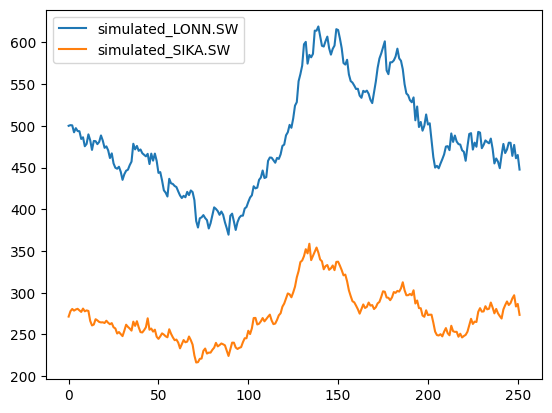

In [8]:

params = {
    'data': data,
    'ticker_list': ['LONN.SW', 'SIKA.SW']
}
test_model = model.PricingModel(params = params)
test_model.data

bus_date_range = utils.create_six_trading_dates('2023-08-09', '2023-08-09')
# display(bus_date_range)
print(bus_date_range.index.to_list())
for date in bus_date_range.index.to_list():
    print(date, type(date))
    try:
        sim_data = test_model.multi_asset_gbm(sim_start_date = utils.add_trading_day(date, 1) , hist_window = 252, sim_window = 252)
        display(sim_data)
    except Exception as e:
        # Log the error with the date that caused it
        raise Exception("MultiGBM has error.")

sim_data.columns = ["simulated_" + ticker for ticker in ticker_list]

# A dataframe with both validation data and simulated data

sim_data.plot()

In [9]:
# # Takes the start and end dates to create a trading calendar for SIX
# # Returns a df with all the dates of trading days as index
# def create_six_trading_dates(start_date, end_date):
#     six_calendar = mcal.get_calendar('SIX')
#     print(f"Holidays in the calendar up to 2200: {six_calendar.holidays().holidays[-10:]}")
#     six_trading_days = six_calendar.valid_days(start_date, end_date)

#     six_trading_days_df = pd.DataFrame(index = six_trading_days)
    
#     # Name the index "Dates"
#     six_trading_days_df.index.name = 'Dates'
#     return six_trading_days_df

trading_df = utils.create_six_trading_dates('2023-01-01', '2023-12-25')
utils.remove_SIX_holidays(data = trading_df)

Holidays in the calendar up to 2200: (numpy.datetime64('2200-04-04'), numpy.datetime64('2200-04-07'), numpy.datetime64('2200-05-01'), numpy.datetime64('2200-05-15'), numpy.datetime64('2200-05-26'), numpy.datetime64('2200-08-01'), numpy.datetime64('2200-12-24'), numpy.datetime64('2200-12-25'), numpy.datetime64('2200-12-26'), numpy.datetime64('2200-12-31'))
The dates to drop are: []


""
Dates
2023-01-03
2023-01-04
2023-01-05
2023-01-06
2023-01-09
...
2023-12-18
2023-12-19
2023-12-20


In [10]:
# # Input is trading date (assumed) and number of trading days to add (can be positive or negative values)
# # Limitation is to range of dates available is between 2000 and 2200
# def add_trading_day(trading_date, num_trading_day):
#     trading_df = utils.create_six_trading_dates('2000-01-01', '2200-12-31')
#     display(trading_df)
#     try:
#         position = trading_df.index.get_loc(trading_date)
#         print(position)
#     except:
#         raise ValueError(f"{trading_date} is not a trading date or is out of the given date range.")

#     new_position = position + num_trading_day

#     try:
#         return trading_df.index[new_position] # Returns the index of the position (cannot use iloc)
#     except:
#         raise IndexError("The resulting trading date is out of bounds.")
    
#     pass
# print(pd.to_datetime('2023-08-10'))
# add_trading_day(pd.to_datetime('2023-11-09'), 1)

In [ ]:


# sim_data.columns = ["simulated_" + ticker for ticker in ticker_list]

# # A dataframe with both validation data and simulated data

# val_df = data[data.index >= sim_start_date]
# print(len(val_df), len(sim_data))
# # Ensure sim_data has the same index as val_df
# sim_data.index = val_df.index

# # Concatenate val_df and sim_data along columns
# val_df_with_sim = pd.concat([val_df, sim_data], axis=1)
# display(val_df_with_sim)

# val_df_with_sim.plot()


In [ ]:
sim_window = 3
Z = np.random.normal(0, 1, (2, sim_window)) # returns a scalar if size is not specified
for t in range(sim_window): # TODO: change to num of days to sim (date range or sth)
    pass

print(Z)
print(Z[0, :])

Using the quotes we obtained from webscrapping, we create a surface with each $\{maturity, strike\}$ couple containing a price. This grid will be instrumental in observing areas where our calibration did not perform as well as we would have wanted it to.

Data needed: (Caleb never used put)
- surface list: mid price (bid + ask) / 2
- maturities list: number of days until maturity / 256.25
- strikes list: Strike price

volSurfaceLong (need to have the rate also)
Long Format DataFrame:
   maturity    strike  price
0       0.5  Strike100   0.20
1       1.0  Strike100   0.22
2       1.5  Strike100   0.24
3       0.5  Strike110   0.21
4       1.0  Strike110   0.23
5       1.5  Strike110   0.25
6       0.5  Strike120   0.22
7       1.0  Strike120   0.24
8       1.5  Strike120   0.26


/Users/tangyiqwan/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/ntu/Acads/4_Y4S1/MH4518/group-project/code/simulation-in-finance
/Users/tangyiqwan/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/ntu/Acads/4_Y4S1/MH4518/group-project/code/simulation-in-finance/data/options/lonn_call.csv


,maturity,strike,price,rate
0,0.028070,310,23.025003,0.0175
1,0.028070,315,18.525003,0.0175
2,0.028070,320,14.450001,0.0175
3,0.028070,325,10.825001,0.0175
4,0.028070,330,7.675001,0.0175
...,...,...,...,...
115,0.892632,360,25.174999,0.0175
116,0.892632,380,18.825001,0.0175
117,0.892632,400,13.925000,0.0175
118,0.892632,410,11.950001,0.0175


/Users/tangyiqwan/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/ntu/Acads/4_Y4S1/MH4518/group-project/code/simulation-in-finance
/Users/tangyiqwan/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/ntu/Acads/4_Y4S1/MH4518/group-project/code/simulation-in-finance/data/options/sika_call.csv


,maturity,strike,price,rate
0,0.028070,195,31.650000,0.0175
1,0.028070,200,26.674999,0.0175
2,0.028070,210,16.775002,0.0175
3,0.028070,220,8.075000,0.0175
4,0.028070,230,2.450000,0.0175
...,...,...,...,...
95,0.892632,240,15.625000,0.0175
96,0.892632,260,9.250000,0.0175
97,0.892632,280,5.225000,0.0175
98,0.892632,300,2.875000,0.0175
